In [1]:
import xml.etree.ElementTree as ET
import os 

In [2]:
def convert_box(size, box):
    dw, dh = 1. / size[0], 1. / size[1]
    x, y, w, h = (box[0] + box[1]) / 2.0 - 1, (box[2] + box[3]) / 2.0 - 1, box[1] - box[0], box[3] - box[2]
    return x * dw, y * dh, w * dw, h * dh

In [4]:
# Converting voc to yolo format

for anno in os.listdir('./data2/labels'):
    if anno.split('.')[1] == 'xml':
        file_name = anno.split('.')[0]
        out_file = open(f'./data2/labels/{file_name}.txt', 'w')

        tree = ET.parse(os.path.join('data2','labels', anno))
        root = tree.getroot()
        size = root.find('size')        
        w = int(size.find('width').text)
        h = int(size.find('height').text)

        names = ['trafficlight', 'speedlimit', 'crosswalk', 'stop']

        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls in names and int(obj.find('difficult').text) != 1:
                xmlbox = obj.find('bndbox')
                bb = convert_box((w, h), [float(xmlbox.find(x).text) for x in ('xmin', 'xmax', 'ymin', 'ymax')])
                cls_id = names.index(cls)  # class id
                out_file.write(" ".join([str(a) for a in (cls_id, *bb)]) + '\n')

In [8]:
%%bash

cp ./yolov5/data/VOC.yaml ./yolov5/VOC.yaml

In [ ]:
%%bash
cd yolov5
python train.py --img 320 --batch 16 --epochs 50 --data VOC.yaml --weights yolov5s.pt --workers 2

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import os
import torch

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\satya/.cache\torch\hub\master.zip
YOLOv5  2023-10-26 Python-3.10.6 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [11]:
torch.save(model, 'yolov5.pt')

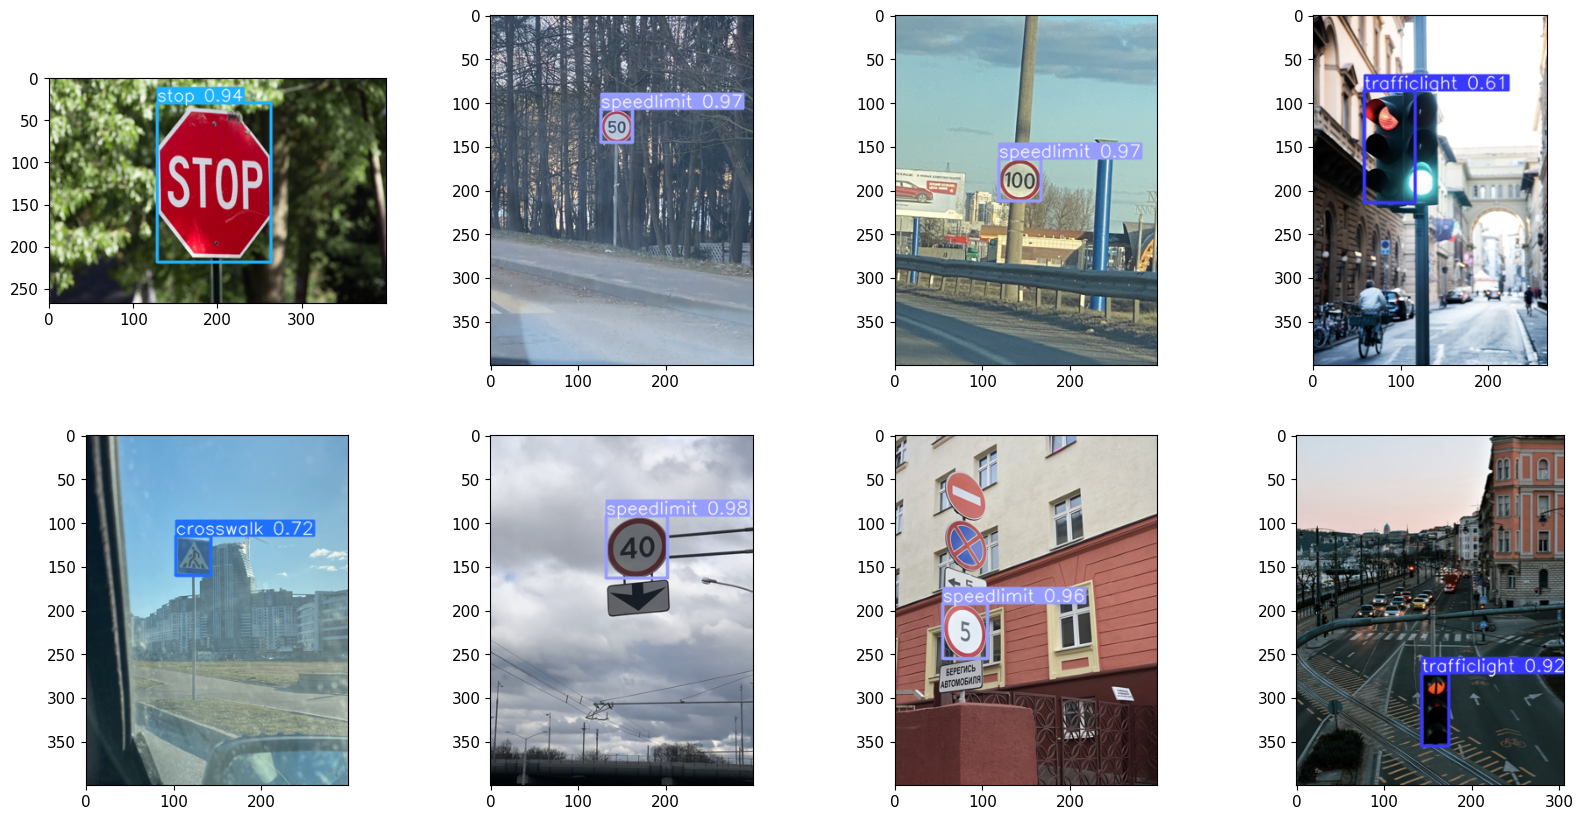

In [21]:
%matplotlib inline
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('./data2/images')

for idx in itertools.product(range(2),range(4)):
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data2/images/{imgname}')
    results = model(img)
    transformed = cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB)
    cv2.imwrite('hello.jpg', transformed)
    ax[idx[0],idx[1]].imshow(transformed)